In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import roc_curve, auc

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\agarw\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [3]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

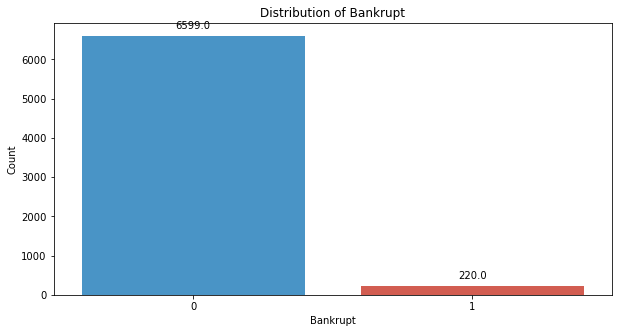

In [4]:
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=df['Bankrupt?'], data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [5]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [6]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

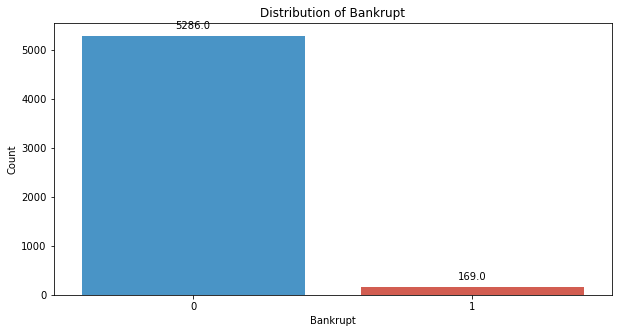

In [7]:
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=y_train, data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [8]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

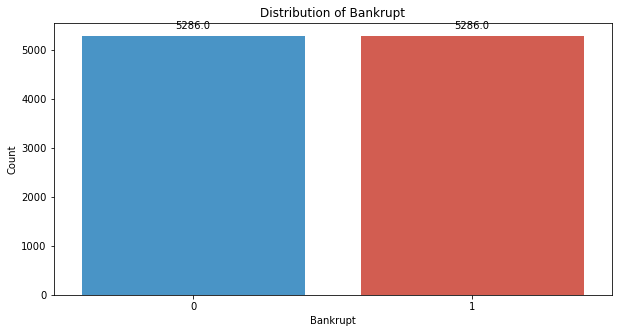

In [10]:
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=y_train_resampled, data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [11]:
# Standardize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
# Reshape data for LSTM
time_steps = 1  # Since there are no timestamps
features = X_train_resampled.shape[1]

In [13]:
X_train_resampled.shape

(10572, 95)

In [14]:
y_train.shape

(5455,)

In [15]:
X_val.shape

(682, 95)

In [16]:
X_test.shape

(682, 95)

In [17]:
features

95

In [18]:
X_train_reshaped = X_train_resampled.reshape(-1, time_steps, features)
X_val_reshaped = X_val.reshape(-1, time_steps, features)
X_test_reshaped = X_test.reshape(-1, time_steps, features)

In [19]:
y_train_reshaped = np.array(y_train_resampled).reshape(-1, time_steps)
y_val_reshaped = np.array(y_val).reshape(-1, time_steps)
y_test_reshaped = np.array(y_test).reshape(-1, time_steps)

In [20]:
X_train_reshaped.shape

(10572, 1, 95)

In [21]:
y_train_reshaped.shape

(10572, 1)

In [22]:
X_val_reshaped.shape

(682, 1, 95)

In [23]:
X_test_reshaped.shape

(682, 1, 95)

In [24]:
y_train_reshaped.shape

(10572, 1)

In [25]:
y_val_reshaped.shape

(682, 1)

In [26]:
y_test_reshaped.shape

(682, 1)

In [27]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, features)))
model.add(Dense(units=1, activation='sigmoid'))

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Train the model using the resampled training data and validate on the validation set
model.fit(X_train_reshaped, y_train_reshaped, epochs=30, batch_size=32,verbose=2)

Epoch 1/30
331/331 - 2s - 5ms/step - accuracy: 0.8909 - loss: 0.3149
Epoch 2/30
331/331 - 0s - 1ms/step - accuracy: 0.9268 - loss: 0.2037
Epoch 3/30
331/331 - 0s - 1ms/step - accuracy: 0.9427 - loss: 0.1609
Epoch 4/30
331/331 - 0s - 1ms/step - accuracy: 0.9575 - loss: 0.1310
Epoch 5/30
331/331 - 0s - 1ms/step - accuracy: 0.9662 - loss: 0.1078
Epoch 6/30
331/331 - 0s - 1ms/step - accuracy: 0.9718 - loss: 0.0897
Epoch 7/30
331/331 - 0s - 1ms/step - accuracy: 0.9775 - loss: 0.0762
Epoch 8/30
331/331 - 0s - 1ms/step - accuracy: 0.9820 - loss: 0.0637
Epoch 9/30
331/331 - 0s - 1ms/step - accuracy: 0.9850 - loss: 0.0549
Epoch 10/30
331/331 - 0s - 1ms/step - accuracy: 0.9873 - loss: 0.0472
Epoch 11/30
331/331 - 0s - 1ms/step - accuracy: 0.9897 - loss: 0.0406
Epoch 12/30
331/331 - 0s - 1ms/step - accuracy: 0.9915 - loss: 0.0348
Epoch 13/30
331/331 - 0s - 1ms/step - accuracy: 0.9917 - loss: 0.0301
Epoch 14/30
331/331 - 0s - 1ms/step - accuracy: 0.9933 - loss: 0.0255
Epoch 15/30
331/331 - 0s - 1m

In [30]:
y_pred_val = model.predict(X_val_reshaped)
y_pred_val_binary = (y_pred_val > 0.5).astype(int)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [31]:
# Evaluate the model's performance on the Validation set
val_accuracy = accuracy_score(y_val_reshaped, y_pred_val_binary)
precision = precision_score(y_val_reshaped, y_pred_val_binary,average='macro')
recall = recall_score(y_val_reshaped, y_pred_val_binary,average='macro')
f1_value = f1_score(y_val_reshaped, y_pred_val_binary,average='macro')
val_report = classification_report(y_val_reshaped, y_pred_val_binary)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.9589442815249267
Precision 0.6709261686325907
Recall 0.7364048338368581
F1 Score 0.6976950354609929
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       662
           1       0.36      0.50      0.42        20

    accuracy                           0.96       682
   macro avg       0.67      0.74      0.70       682
weighted avg       0.97      0.96      0.96       682



In [32]:
conf_matrix = confusion_matrix(y_val_reshaped.ravel(), y_pred_val_binary.ravel())
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[644  18]
 [ 10  10]]


In [33]:
y_pred_test = model.predict(X_test_reshaped)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


In [34]:
# Evaluate the model's performance on the Testing set
val_accuracy = accuracy_score(y_test_reshaped, y_pred_test_binary)
precision = precision_score(y_test_reshaped, y_pred_test_binary,average='macro')
recall = recall_score(y_test_reshaped, y_pred_test_binary,average='macro')
f1_value = f1_score(y_test_reshaped, y_pred_test_binary,average='macro')
val_report = classification_report(y_test_reshaped, y_pred_test_binary)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.9486803519061584
Precision 0.6923758865248227
Recall 0.6505376344086021
F1 Score 0.6684491978609626
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       651
           1       0.42      0.32      0.36        31

    accuracy                           0.95       682
   macro avg       0.69      0.65      0.67       682
weighted avg       0.94      0.95      0.95       682



In [35]:
conf_matrix = confusion_matrix(y_test_reshaped.ravel(), y_pred_test_binary.ravel())
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[637  14]
 [ 21  10]]


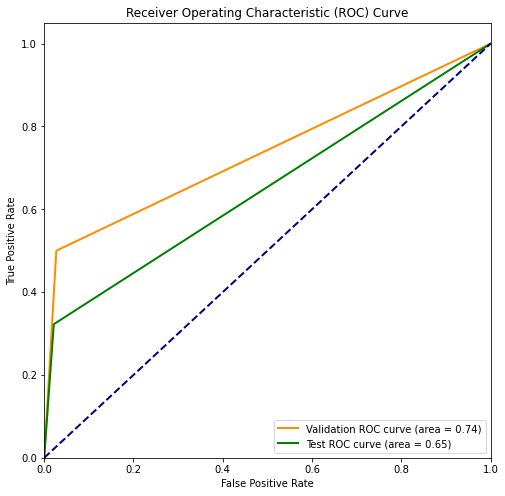

In [36]:
# Compute ROC curve and ROC area for each class
fpr_val, tpr_val, _ = roc_curve(y_val_reshaped.ravel(), y_pred_val_binary.ravel())
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test_reshaped.ravel(), y_pred_test_binary.ravel())
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()